In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from tensorflow.keras.utils import to_categorical
from scipy.stats import linregress

2022-10-08 19:53:18.815477: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df_list = pd.read_csv("Resources/cleandata/clean_listings.csv")
df_list.head()

,listing_id,city,state,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating
0,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0
1,953595,Seattle,WA,98119,47.639123,-122.365666,4,1.0,1.0,1.0,150,96.0
2,3308979,Seattle,WA,98119,47.629724,-122.369483,11,4.5,5.0,7.0,975,97.0
3,278830,Seattle,WA,98119,47.632918,-122.372471,6,2.0,3.0,3.0,450,92.0
4,5956968,Seattle,WA,98119,47.630525,-122.366174,2,1.0,1.0,1.0,120,95.0


In [3]:
df_cal = pd.read_csv("Resources/cleandata/clean_calendar.csv")
df_cal.head()

,listing_id,date,available,price
0,241032,1,t,85
1,241032,1,t,85
2,241032,1,t,85
3,241032,1,t,85
4,241032,1,t,85


In [4]:
df_cal_g = df_cal.groupby(['listing_id','date']).mean()
df_cal_g

price
listing_id date       
3335       1     120.0
           2     120.0
           3     120.0
           4     120.0
           5     120.0
...                ...
10340165   8      43.0
           9      43.0
           10     43.0
           11     43.0
           12     43.0

[33939 rows x 1 columns]

In [5]:
df_cal_g = df_cal_g.reset_index(level=['date'])
df_cal_g.head()

,date,price
listing_id,,
3335,1,120.0
3335,2,120.0
3335,3,120.0
3335,4,120.0
3335,5,120.0


In [6]:
df = df_list.merge(df_cal_g, how='inner', on='listing_id')
df.head()

,listing_id,city,state,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price_x,review_scores_rating,date,price_y
0,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,1,85.0
1,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,2,85.0
2,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,3,85.0
3,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,4,85.0
4,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,5,85.0


In [7]:
df.rename(columns={"price_y":'price','date':'month'}, inplace=True)
df.head()

,listing_id,city,state,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price_x,review_scores_rating,month,price
0,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,1,85.0
1,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,2,85.0
2,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,3,85.0
3,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,4,85.0
4,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,5,85.0


In [8]:
df.drop(columns=['state','listing_id','price_x'], inplace=True)

In [9]:
df.head()

,city,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,review_scores_rating,month,price
0,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,1,85.0
1,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,2,85.0
2,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,3,85.0
3,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,4,85.0
4,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,5,85.0


In [10]:
df.price.min()

20.0

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 2.6000e+01, 0.0000e+00,
        8.0000e+00, 8.0000e+00, 1.2300e+02, 1.8200e+02, 2.3200e+02,
        1.1420e+03, 1.7220e+03, 6.9350e+03, 1.8073e+04]),
 array([ 20.        ,  25.71428571,  31.42857143,  37.14285714,
         42.85714286,  48.57142857,  54.28571429,  60.        ,
         65.71428571,  71.42857143,  77.14285714,  82.85714286,
         88.57142857,  94.28571429, 100.        ]),
 <BarContainer object of 14 artists>)

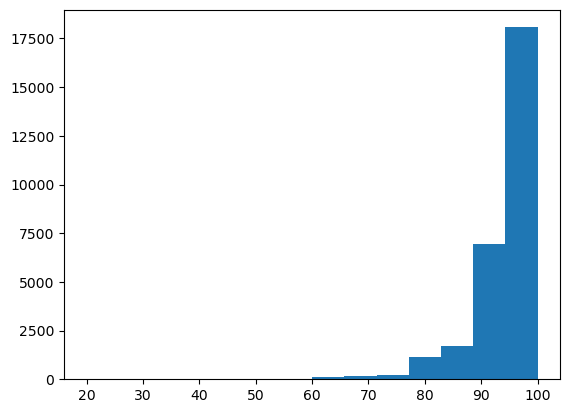

In [11]:
plt.hist(df['review_scores_rating'], bins=14)

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.6000e+01, 0.0000e+00, 1.2000e+01, 1.0300e+02,
        1.8300e+02, 3.1400e+02, 3.2470e+03, 2.4566e+04]),
 array([1.30103   , 1.35095642, 1.40088285, 1.45080928, 1.50073571,
        1.55066214, 1.60058857, 1.650515  , 1.70044143, 1.75036786,
        1.80029428, 1.85022071, 1.90014714, 1.95007357, 2.        ]),
 <BarContainer object of 14 artists>)

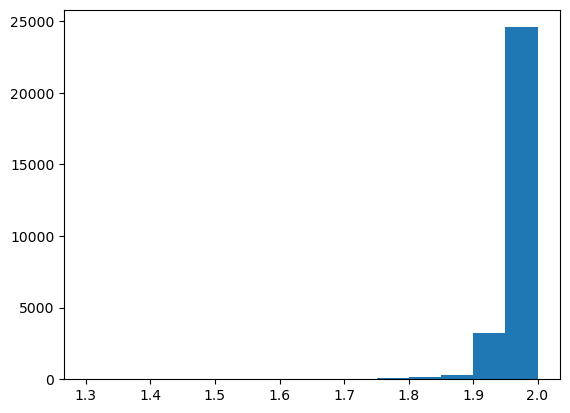

In [12]:
plt.hist(df['review_scores_rating'].apply(np.log10), bins=14)

In [13]:
df['review_scores_rating'] = df['review_scores_rating'].apply(np.log10)

(array([21084.,  4754.,  2381.,   167.,    67.]),
 array([0. , 1.4, 2.8, 4.2, 5.6, 7. ]),
 <BarContainer object of 5 artists>)

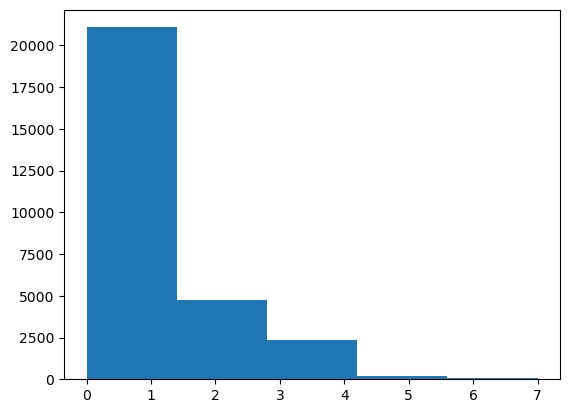

In [14]:
plt.hist(df['bedrooms'], bins=5)

(array([ 2680., 18404.,  4754.,  2381.,   234.]),
 array([0.        , 0.52915026, 1.05830052, 1.58745079, 2.11660105,
        2.64575131]),
 <BarContainer object of 5 artists>)

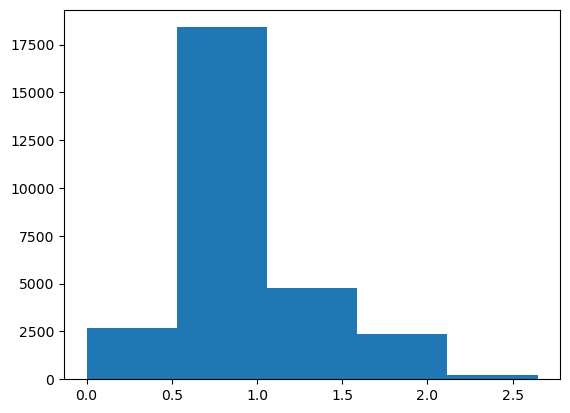

In [15]:
plt.hist(df['bedrooms'].apply(np.sqrt), bins=5)

In [16]:
df['bedrooms']=df['bedrooms'].apply(np.sqrt)

(array([2.3801e+04, 4.0490e+03, 5.7400e+02, 2.4000e+01, 5.0000e+00]),
 array([0. , 1.6, 3.2, 4.8, 6.4, 8. ]),
 <BarContainer object of 5 artists>)

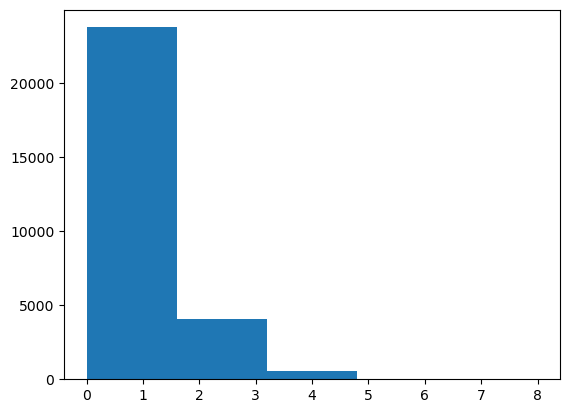

In [17]:
plt.hist(df['bathrooms'], bins=5)

(array([   38.,   226., 23537.,  4594.,    58.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

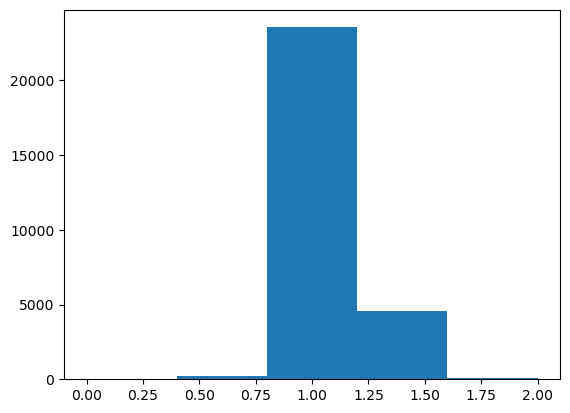

In [18]:
plt.hist(df['bathrooms'].apply(lambda x: pow(x,1/3)), bins=5)

In [19]:
df['bathrooms'] = df['bathrooms'].apply(lambda x: pow(x,1/3))

(array([16953.,  9794.,  1253.,   373.,    80.]),
 array([ 1.,  4.,  7., 10., 13., 16.]),
 <BarContainer object of 5 artists>)

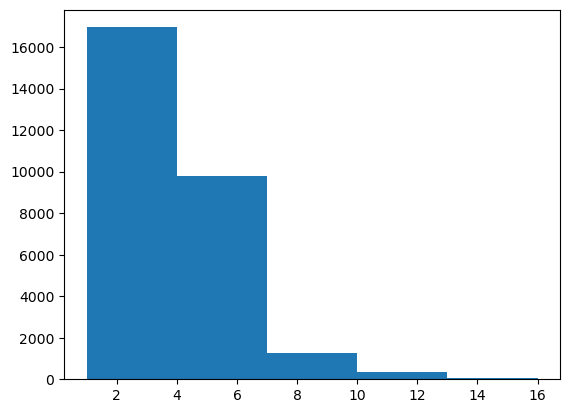

In [20]:
plt.hist(df['accommodates'], bins=5)

(array([ 1786., 15167.,  7163.,  3884.,   453.]),
 array([0.        , 0.240824  , 0.48164799, 0.72247199, 0.96329599,
        1.20411998]),
 <BarContainer object of 5 artists>)

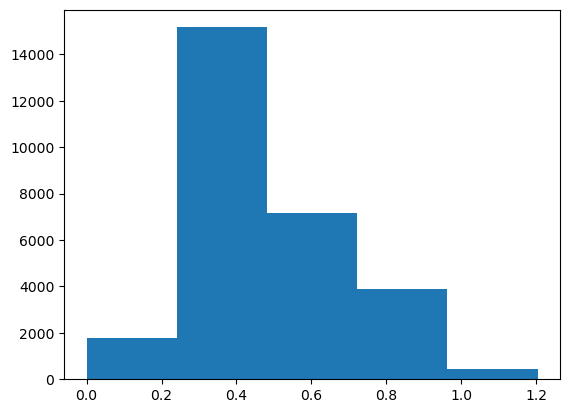

In [21]:
plt.hist(df['accommodates'].apply(np.log10), bins=5)

In [22]:
df['accommodates']=df['accommodates'].apply(np.log10)

(array([2.753e+04, 6.620e+02, 1.990e+02, 2.600e+01, 2.400e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.200e+01]),
 array([  1. ,  23.4,  45.8,  68.2,  90.6, 113. , 135.4, 157.8, 180.2,
        202.6, 225. ]),
 <BarContainer object of 10 artists>)

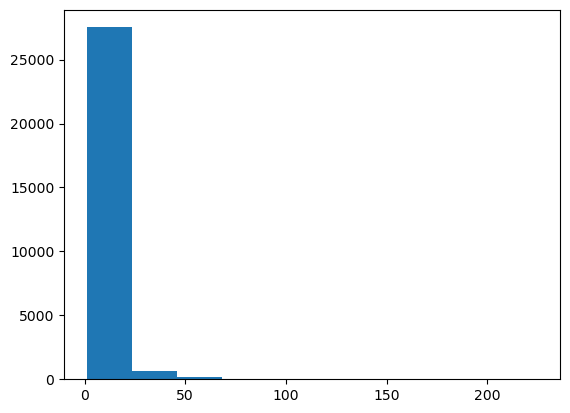

In [23]:
plt.hist(df.beds.apply(lambda x: pow(x,2)), bins =10)

In [24]:
df.beds = df.beds.apply(lambda x: pow(x,2))

In [25]:
enc = OneHotEncoder(sparse=False)
encode_df = pd.DataFrame(enc.fit_transform(df[['city','zipcode','month']]))
encode_df.columns = enc.get_feature_names(['city','zipcode','month'])

/Users/johnwhendricks/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
df = df.merge(encode_df, left_index=True, right_index=True)
df.drop(columns=['city','zipcode','month'], inplace=True)

In [27]:
df.head()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,review_scores_rating,price,"city_Ballard, Seattle",city_Phinney Ridge Seattle,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,47.636289,-122.371025,0.60206,1.0,1.0,1.0,1.977724,85.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,47.636289,-122.371025,0.60206,1.0,1.0,1.0,1.977724,85.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,47.636289,-122.371025,0.60206,1.0,1.0,1.0,1.977724,85.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47.636289,-122.371025,0.60206,1.0,1.0,1.0,1.977724,85.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47.636289,-122.371025,0.60206,1.0,1.0,1.0,1.977724,85.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
X = df.drop(columns=['price'])
y = df['price']

In [29]:
print(X.shape)
print(y.shape)

(28453, 53)
(28453,)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [31]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [32]:
X_train_scaled

array([[ 0.88941761,  0.5591149 , -0.69170731, ..., -0.2911956 ,
        -0.298798  , -0.29870494],
       [-0.35656858,  0.10011489,  0.59522246, ..., -0.2911956 ,
        -0.298798  , -0.29870494],
       [ 0.81075235, -0.07055911,  1.34802812, ..., -0.2911956 ,
         3.34674261, -0.29870494],
       ...,
       [ 0.68617165, -0.86750863, -0.69170731, ..., -0.2911956 ,
        -0.298798  , -0.29870494],
       [ 0.81885909,  0.9373081 , -0.69170731, ..., -0.2911956 ,
        -0.298798  , -0.29870494],
       [ 1.23753342, -1.46959965, -0.69170731, ..., -0.2911956 ,
         3.34674261, -0.29870494]])

In [33]:
y_train

5544      75.000000
21843    250.000000
2125     250.000000
18841     84.000000
1479      93.750000
            ...    
13900    125.000000
399      150.000000
27757     66.600000
5823      91.709677
22179     75.000000
Name: price, Length: 21339, dtype: float64

In [34]:
input_dim = X.shape[1]

model = Sequential([
    Dense(200, input_dim = input_dim, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
#     Dense(50, activation='relu'),
    Dense(1)
])

model.summary()

2022-10-08 19:53:24.432148: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               10800     
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 36,001
Trainable params: 36,001
Non-trainable params: 0
_________________________________________________________________


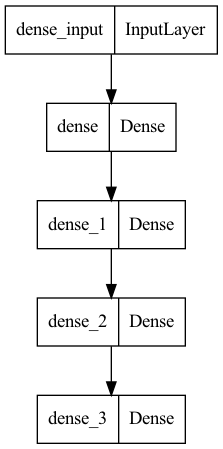

In [35]:
tf.keras.utils.plot_model(model)

In [36]:
model.compile(optimizer='adam',loss='mse')

In [37]:
history = model.fit(X_train_scaled, y_train, epochs=500, validation_data=(X_test_scaled, y_test))

Epoch 1/500
667/667 [==============================] - 2s 2ms/step - loss: 5535.1084 - val_loss: 4583.5571
Epoch 2/500
667/667 [==============================] - 1s 2ms/step - loss: 3671.9690 - val_loss: 4301.4551
Epoch 3/500
667/667 [==============================] - 1s 2ms/step - loss: 3528.6946 - val_loss: 4186.7671
Epoch 4/500
667/667 [==============================] - 1s 2ms/step - loss: 3442.1768 - val_loss: 4147.8901
Epoch 5/500
667/667 [==============================] - 1s 2ms/step - loss: 3338.9580 - val_loss: 4080.7808
Epoch 6/500
667/667 [==============================] - 1s 2ms/step - loss: 3269.3000 - val_loss: 4033.8347
Epoch 7/500
667/667 [==============================] - 1s 2ms/step - loss: 3193.0781 - val_loss: 3980.8843
Epoch 8/500
667/667 [==============================] - 1s 2ms/step - loss: 3099.4104 - val_loss: 3835.4102
Epoch 9/500
667/667 [==============================] - 1s 2ms/step - loss: 3047.7502 - val_loss: 3721.5776
Epoch 10/500
667/667 [===============

667/667 [==============================] - 1s 2ms/step - loss: 786.7426 - val_loss: 1337.1060
Epoch 78/500
667/667 [==============================] - 1s 2ms/step - loss: 761.1336 - val_loss: 1353.6736
Epoch 79/500
667/667 [==============================] - 1s 2ms/step - loss: 797.8633 - val_loss: 1309.8562
Epoch 80/500
667/667 [==============================] - 1s 2ms/step - loss: 806.1521 - val_loss: 1270.0798
Epoch 81/500
667/667 [==============================] - 1s 2ms/step - loss: 708.7456 - val_loss: 1419.0261
Epoch 82/500
667/667 [==============================] - 1s 2ms/step - loss: 698.8598 - val_loss: 1337.6796
Epoch 83/500
667/667 [==============================] - 1s 2ms/step - loss: 712.2505 - val_loss: 1406.8440
Epoch 84/500
667/667 [==============================] - 1s 2ms/step - loss: 748.1447 - val_loss: 1364.1910
Epoch 85/500
667/667 [==============================] - 1s 2ms/step - loss: 718.1541 - val_loss: 1343.9536
Epoch 86/500
667/667 [============================

667/667 [==============================] - 1s 2ms/step - loss: 420.1288 - val_loss: 989.7605
Epoch 154/500
667/667 [==============================] - 1s 2ms/step - loss: 417.0768 - val_loss: 1037.6971
Epoch 155/500
667/667 [==============================] - 1s 2ms/step - loss: 461.2911 - val_loss: 990.1521
Epoch 156/500
667/667 [==============================] - 1s 2ms/step - loss: 407.2228 - val_loss: 1048.3936
Epoch 157/500
667/667 [==============================] - 1s 2ms/step - loss: 448.3256 - val_loss: 967.1935
Epoch 158/500
667/667 [==============================] - 1s 2ms/step - loss: 398.2818 - val_loss: 963.2204
Epoch 159/500
667/667 [==============================] - 1s 2ms/step - loss: 395.2265 - val_loss: 994.0994
Epoch 160/500
667/667 [==============================] - 1s 2ms/step - loss: 410.8278 - val_loss: 1082.5869
Epoch 161/500
667/667 [==============================] - 1s 2ms/step - loss: 406.5260 - val_loss: 964.1622
Epoch 162/500
667/667 [=========================

667/667 [==============================] - 1s 2ms/step - loss: 316.0618 - val_loss: 915.8377
Epoch 230/500
667/667 [==============================] - 1s 2ms/step - loss: 281.2455 - val_loss: 873.6067
Epoch 231/500
667/667 [==============================] - 1s 2ms/step - loss: 280.0228 - val_loss: 829.6071
Epoch 232/500
667/667 [==============================] - 1s 2ms/step - loss: 279.9034 - val_loss: 903.4917
Epoch 233/500
667/667 [==============================] - 1s 2ms/step - loss: 279.1371 - val_loss: 862.5441
Epoch 234/500
667/667 [==============================] - 1s 2ms/step - loss: 282.5613 - val_loss: 861.8536
Epoch 235/500
667/667 [==============================] - 1s 2ms/step - loss: 272.2466 - val_loss: 862.9789
Epoch 236/500
667/667 [==============================] - 1s 2ms/step - loss: 280.4544 - val_loss: 886.2823
Epoch 237/500
667/667 [==============================] - 1s 2ms/step - loss: 322.6818 - val_loss: 917.3650
Epoch 238/500
667/667 [============================

667/667 [==============================] - 1s 2ms/step - loss: 217.6246 - val_loss: 804.2466
Epoch 306/500
667/667 [==============================] - 1s 2ms/step - loss: 216.8531 - val_loss: 824.0237
Epoch 307/500
667/667 [==============================] - 1s 2ms/step - loss: 204.4665 - val_loss: 763.7607
Epoch 308/500
667/667 [==============================] - 1s 2ms/step - loss: 219.6752 - val_loss: 811.6940
Epoch 309/500
667/667 [==============================] - 1s 2ms/step - loss: 221.4536 - val_loss: 842.5240
Epoch 310/500
667/667 [==============================] - 1s 2ms/step - loss: 206.6360 - val_loss: 817.4997
Epoch 311/500
667/667 [==============================] - 1s 2ms/step - loss: 202.2700 - val_loss: 864.1874
Epoch 312/500
667/667 [==============================] - 1s 2ms/step - loss: 210.8372 - val_loss: 827.7950
Epoch 313/500
667/667 [==============================] - 1s 2ms/step - loss: 220.9631 - val_loss: 808.8405
Epoch 314/500
667/667 [============================

667/667 [==============================] - 1s 2ms/step - loss: 178.0396 - val_loss: 761.3052
Epoch 382/500
667/667 [==============================] - 1s 2ms/step - loss: 181.5505 - val_loss: 753.6675
Epoch 383/500
667/667 [==============================] - 1s 2ms/step - loss: 170.9418 - val_loss: 800.5621
Epoch 384/500
667/667 [==============================] - 1s 2ms/step - loss: 176.3918 - val_loss: 818.6768
Epoch 385/500
667/667 [==============================] - 1s 2ms/step - loss: 179.9768 - val_loss: 792.5360
Epoch 386/500
667/667 [==============================] - 1s 2ms/step - loss: 175.2827 - val_loss: 755.3459
Epoch 387/500
667/667 [==============================] - 1s 2ms/step - loss: 165.1476 - val_loss: 785.5975
Epoch 388/500
667/667 [==============================] - 1s 2ms/step - loss: 173.4062 - val_loss: 778.1149
Epoch 389/500
667/667 [==============================] - 1s 2ms/step - loss: 172.5850 - val_loss: 761.9062
Epoch 390/500
667/667 [============================

667/667 [==============================] - 1s 2ms/step - loss: 157.3638 - val_loss: 747.2849
Epoch 458/500
667/667 [==============================] - 1s 1ms/step - loss: 146.8111 - val_loss: 742.6933
Epoch 459/500
667/667 [==============================] - 1s 2ms/step - loss: 142.5622 - val_loss: 734.5380
Epoch 460/500
667/667 [==============================] - 1s 2ms/step - loss: 144.3599 - val_loss: 734.0853
Epoch 461/500
667/667 [==============================] - 1s 2ms/step - loss: 150.3904 - val_loss: 767.2452
Epoch 462/500
667/667 [==============================] - 1s 2ms/step - loss: 152.0057 - val_loss: 750.2512
Epoch 463/500
667/667 [==============================] - 1s 2ms/step - loss: 149.5146 - val_loss: 798.3230
Epoch 464/500
667/667 [==============================] - 1s 2ms/step - loss: 151.0380 - val_loss: 774.6005
Epoch 465/500
667/667 [==============================] - 1s 2ms/step - loss: 151.8434 - val_loss: 775.5541
Epoch 466/500
667/667 [============================

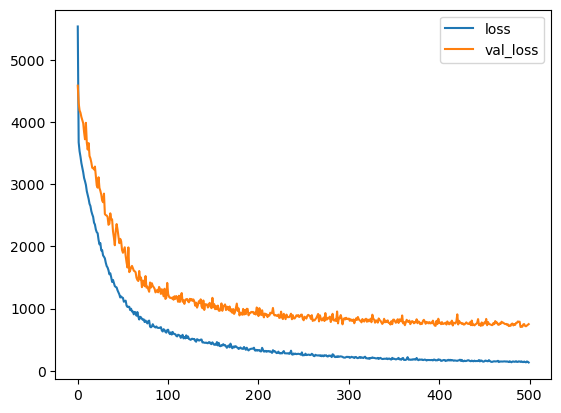

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.legend()
plt.show()

In [39]:
y_pred = model.predict(X_test_scaled)

223/223 [==============================] - 0s 824us/step


Text(0.5, 0, 'predicted price')

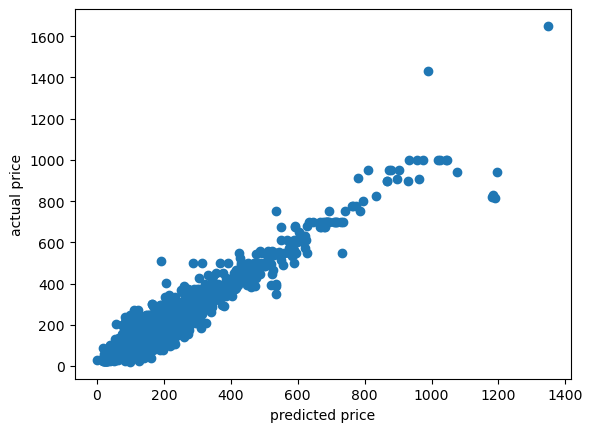

In [40]:
plt.scatter(y_pred, y_test)
plt.ylabel('actual price')
plt.xlabel('predicted price')

In [41]:
y_pred.tolist()

[[81.5790786743164],
 [70.76599884033203],
 [87.30386352539062],
 [74.58077239990234],
 [136.2648468017578],
 [130.91026306152344],
 [86.60253143310547],
 [276.8518371582031],
 [198.64144897460938],
 [66.85086822509766],
 [84.40567016601562],
 [174.53659057617188],
 [92.4414291381836],
 [204.35292053222656],
 [94.48261260986328],
 [138.43809509277344],
 [157.42027282714844],
 [200.8074188232422],
 [135.97837829589844],
 [131.14739990234375],
 [99.8825454711914],
 [120.8974609375],
 [67.39261627197266],
 [65.56170654296875],
 [191.3939971923828],
 [175.67138671875],
 [89.61470794677734],
 [40.369083404541016],
 [204.8717041015625],
 [64.26065826416016],
 [68.78325653076172],
 [146.13897705078125],
 [129.08590698242188],
 [64.41436767578125],
 [73.1654052734375],
 [108.82855987548828],
 [140.28187561035156],
 [489.8568115234375],
 [114.81803131103516],
 [86.6526107788086],
 [95.30148315429688],
 [47.88231658935547],
 [70.81060028076172],
 [263.8464050292969],
 [83.52261352539062],
 [82.1

In [42]:
y_test.values.tolist()

[95.0,
 70.0,
 105.0,
 55.0,
 135.0,
 128.0,
 82.53333333333333,
 252.57142857142858,
 295.6896551724138,
 69.0,
 70.0,
 159.83870967741936,
 107.0,
 209.51612903225808,
 107.06451612903226,
 153.8709677419355,
 148.8709677419355,
 225.0,
 84.03448275862068,
 89.1,
 166.7741935483871,
 95.0,
 49.0,
 99.0,
 178.0,
 197.66666666666666,
 105.0,
 55.0,
 175.0,
 80.0,
 76.26666666666667,
 131.4516129032258,
 97.6896551724138,
 69.0,
 69.0,
 106.75862068965517,
 131.6,
 487.16129032258067,
 110.9047619047619,
 97.58064516129032,
 108.6774193548387,
 65.0,
 77.0,
 257.2903225806452,
 65.0,
 100.0,
 66.0,
 100.0,
 125.0,
 135.0,
 120.0,
 217.5,
 128.0,
 169.29032258064515,
 79.0,
 95.0,
 63.0,
 200.0,
 128.0,
 45.0,
 40.0,
 95.0,
 180.0,
 101.5925925925926,
 155.0,
 256.61290322580646,
 62.38709677419355,
 120.96774193548387,
 75.0,
 87.5,
 40.8,
 71.58064516129032,
 91.66666666666667,
 142.58064516129033,
 403.2258064516129,
 120.0,
 150.0,
 45.0,
 76.0,
 93.2258064516129,
 78.0,
 100.0,
 85.

In [98]:
results_df = pd.DataFrame({'predicted price':y_pred[:,0]})
results_df.head()

,predicted price
0,81.579079
1,70.765999
2,87.303864
3,74.580772
4,136.264847


In [99]:
results_df['actual price'] = y_test.values

In [100]:
results_df.head(20)

,predicted price,actual price
0,81.579079,95.000000
1,70.765999,70.000000
2,87.303864,105.000000
3,74.580772,55.000000
4,136.264847,135.000000
5,130.910263,128.000000
6,86.602531,82.533333
7,276.851837,252.571429
8,198.641449,295.689655
9,66.850868,69.000000


In [109]:
results_df['diff'] = abs(results_df['predicted price'] - results_df['actual price'])
results_df

,predicted price,actual price,diff,lower,upper,accurate
0,81.579079,95.000000,13.420921,65.0,98.0,True
1,70.765999,70.000000,0.765999,55.0,87.0,True
2,87.303864,105.000000,17.696136,71.0,104.0,False
3,74.580772,55.000000,19.580772,58.0,91.0,False
4,136.264847,135.000000,1.264847,120.0,152.0,True
...,...,...,...,...,...,...
7109,240.164459,250.000000,9.835541,224.0,256.0,True
7110,121.419640,120.161290,1.258349,105.0,138.0,True
7111,79.375832,59.416667,19.959165,63.0,96.0,False
7112,109.147194,119.000000,9.852806,93.0,125.0,True


In [110]:
diffs = results_df['diff'].sum() / results_df.shape[0]
results_df['lower'] = round(results_df['predicted price'] - 2*diffs)
results_df['upper'] = round(results_df['predicted price'] + 2*diffs)

results_df.loc[results_df['lower'] < 20, 'lower'] = 20

results_df['accurate'] = (results_df['lower'] <= results_df['actual price']) & (results_df['actual price'] <= results_df['upper']) 
results_df.tail()

,predicted price,actual price,diff,lower,upper,accurate
7109,240.164459,250.000000,9.835541,208.0,273.0,True
7110,121.419640,120.161290,1.258349,89.0,154.0,True
7111,79.375832,59.416667,19.959165,47.0,112.0,True
7112,109.147194,119.000000,9.852806,77.0,142.0,True
7113,223.857300,250.000000,26.142700,191.0,256.0,True


In [111]:
results_df.head(20)

,predicted price,actual price,diff,lower,upper,accurate
0,81.579079,95.000000,13.420921,49.0,114.0,True
1,70.765999,70.000000,0.765999,38.0,103.0,True
2,87.303864,105.000000,17.696136,55.0,120.0,True
3,74.580772,55.000000,19.580772,42.0,107.0,True
4,136.264847,135.000000,1.264847,104.0,169.0,True
5,130.910263,128.000000,2.910263,98.0,163.0,True
6,86.602531,82.533333,4.069198,54.0,119.0,True
7,276.851837,252.571429,24.280409,244.0,309.0,True
8,198.641449,295.689655,97.048206,166.0,231.0,False
9,66.850868,69.000000,2.149132,34.0,99.0,True


In [112]:
results_df[results_df['accurate'] == False]

,predicted price,actual price,diff,lower,upper,accurate
8,198.641449,295.689655,97.048206,166.0,231.0,False
18,135.978378,84.034483,51.943896,104.0,168.0,False
19,131.147400,89.100000,42.047400,99.0,164.0,False
20,99.882545,166.774194,66.891648,67.0,132.0,False
23,65.561707,99.000000,33.438293,33.0,98.0,False
...,...,...,...,...,...,...
7066,462.887054,425.666667,37.220388,430.0,495.0,False
7078,334.973145,385.000000,50.026855,303.0,367.0,False
7091,107.153191,169.000000,61.846809,75.0,140.0,False
7097,142.950073,95.000000,47.950073,111.0,175.0,False


In [113]:
results_df['accurate'].value_counts()

True     6259
False     855
Name: accurate, dtype: int64

In [114]:
results_df['accurate'].value_counts()[1] / results_df['accurate'].value_counts().sum()

0.8798144503795333

In [115]:
_, _, r_value, _, _ = linregress(results_df['predicted price'].values,results_df['actual price'].values)

In [116]:
print('r value:',r_value)

r value: 0.9679831710408056
